In [1]:
import pandas as pd
import plotly.express as px
from datetime import datetime, time
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("../data/Braila_new_data/braila_flow211206H360.csv")
display(df)

,time,flow_rate_value,totalizer1,totalizer2,consumer_totalizer,analog_input1,analog_input2,batery_capacity,alarms_in_decimal
0,1.608034e+09,22.466,16371.801,-968.348,15403.452,0.007,0.938,46.0,67245080.0
1,1.608034e+09,278.256,16374.305,-968.348,15405.957,0.007,0.934,46.0,67245080.0
2,1.608034e+09,62.076,16377.466,-968.348,15409.117,0.007,0.938,46.0,67245080.0
3,1.608034e+09,28.493,16377.950,-968.348,15409.601,0.000,0.938,46.0,67245080.0
4,1.608034e+09,26.425,16378.346,-968.348,15409.998,0.007,0.939,46.0,67245080.0
...,...,...,...,...,...,...,...,...,...
470154,1.638763e+09,18.848,207118.649,-1474.793,205643.856,0.000,0.943,20.0,67376216.0
470155,1.638763e+09,20.592,207118.984,-1474.793,205644.191,0.007,0.932,20.0,67376216.0
470156,1.638763e+09,22.853,207119.354,-1474.793,205644.560,0.007,0.943,20.0,67376216.0
470157,1.638763e+09,22.534,207119.736,-1474.793,205644.942,0.007,0.941,20.0,67376216.0


In [ ]:
fig = px.line(df[30000:], x = 'time', y = 'flow_rate_value', title='Braila data')
fig.show()

In [53]:
for i in range(15000):
    if(df['analog2'][i+1]<0.79 and df['analog2'][i]>0.81):
        print(df['timestamp'][i])

2019-10-21 22:45:00
2019-10-22 09:30:00
2019-10-22 22:45:00
2019-10-23 22:45:00
2019-10-24 22:45:00
2019-10-25 22:45:00
2019-10-26 22:45:00
2019-10-27 23:45:00
2019-10-28 23:45:00
2019-10-29 23:45:00
2019-10-30 23:45:00
2019-10-31 23:45:00
2019-11-01 23:45:00
2019-11-02 23:45:00
2019-11-03 23:45:00
2019-11-04 23:45:00
2019-11-05 23:45:00
2019-11-06 23:45:00
2019-11-07 23:45:00
2019-11-08 23:45:00
2019-11-09 23:45:00
2019-11-10 23:45:00
2019-11-11 23:45:00
2019-11-12 23:45:00
2019-11-13 23:45:00
2019-11-14 23:45:00
2019-11-15 23:45:00
2019-11-16 23:45:00
2019-11-17 23:45:00
2019-11-18 23:45:00
2019-11-19 23:45:00
2019-11-20 23:45:00
2019-11-21 23:45:00
2019-11-22 23:45:00
2019-11-23 23:45:00
2019-11-24 23:45:00
2019-11-25 23:45:00
2019-11-26 23:45:00
2019-11-27 23:45:00
2019-11-28 23:45:00
2019-11-29 23:45:00
2019-11-30 23:45:00
2019-12-01 23:45:00
2019-12-02 23:45:00
2019-12-03 23:45:00
2019-12-04 23:45:00
2019-12-05 23:45:00
2019-12-06 23:45:00
2019-12-07 23:45:00
2019-12-08 23:45:00


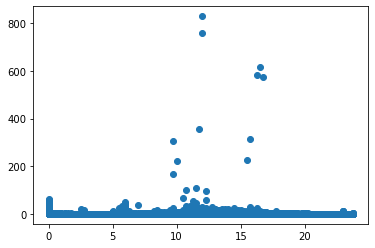

In [69]:
FVs = []
for i in range(1, 10000):
    FV = [0, 0]
    
    dt = df['timestamp'][i]
    
    if(len(str(dt)) == 19):
        dt = datetime.strptime(dt, '%Y-%m-%d %H:%M:%S')
    else:
        dt = datetime.strptime(dt, '%Y-%m-%d %H:%M:%S.%f')
        
    FV[0] = (dt.hour*60 + dt.minute)/60
    
    minutes = int(dt.hour)*60 + int(dt.minute)
    time_feat = min([abs(minutes - 4*60), abs(minutes - 22*60),abs(minutes +2*60)])
    FV[1] = time_feat**2*abs(df['analog2'][i-1] - df['analog2'][i])**2
    FV = np.array(FV)
    FVs.append(FV)
FVs = np.array(FVs)
plt.scatter(FVs[:,0], FVs[:,1])
    
    
    

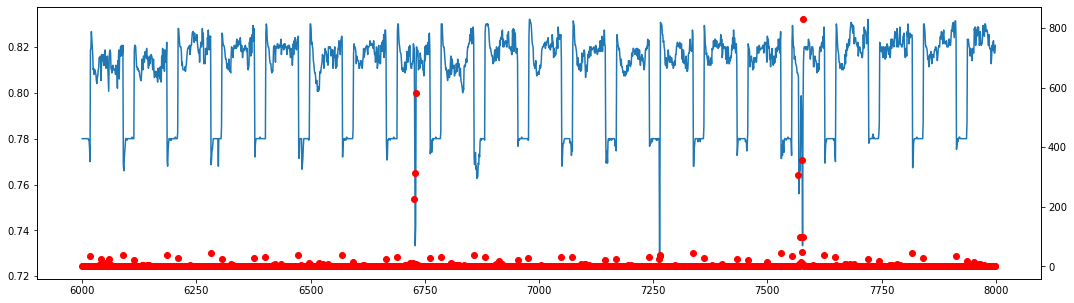

In [75]:
fr = 6000
to = 8000

fig, ax1 = plt.subplots(figsize = (18, 5))
ax1.plot(df['analog2'][fr:to])

ax2 = ax1.twinx()

ax2.scatter(range(fr, to),FVs[:,1][fr:to], c = 'r')



In [ ]:
df_border = pd.read_csv("../log/braila_bordercheck.csv")

# make status code as discrete value
df_border["status_code"] = df_border["status_code"].astype(str)

# make graph
fig = px.scatter(df_border, x="timestamp", y="value", color="status_code", hover_data=['status'], color_discrete_sequence=["green", "yellow", "red"])
fig.show()

In [ ]:
df_welford = pd.read_csv("../log/braila_welford.csv")

# make status code as discrete value
df_welford["status_code"] = df_welford["status_code"].astype(str)

# make graph
fig = px.scatter(df_welford, x="timestamp", y="value", color="status_code", hover_data=['status'], color_discrete_sequence=["blue", "green", "yellow", "red"])
fig.show()

In [ ]:
df_welford_unlimited = pd.read_csv("../log/braila_welford_unlimited.csv")

# make status code as discrete value
df_welford_unlimited["status_code"] = df_welford_unlimited["status_code"].astype(str)

# make graph
fig = px.scatter(df_welford_unlimited, x="timestamp", y="value", color="status_code", hover_data=['status'], color_discrete_sequence=["blue", "green", "red", "yellow"])
fig.show()

In [ ]:
df_filtering = pd.read_csv("../log/braila_filtering.csv")

# make status code as discrete value
df_filtering["status_code"] = df_filtering["status_code"].astype(str)

# make graph
fig = px.scatter(df_filtering, x="timestamp", y="value", color="status_code", hover_data=['status'], color_discrete_sequence=["red", "green", "yellow"])
fig.show()